In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# Set style and settings
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 15)

In [3]:
# Load data and set Datetime column
collisions = pd.read_csv('../data/external/Collisions.csv', 
                         parse_dates={'Datetime': ['INCDTTM']}, 
                         infer_datetime_format=True)

In [4]:
# Clean up and set index to datetime
collisions = (
    collisions.set_index('Datetime')
    .sort_index()
    .drop(columns=['EXCEPTRSNDESC', 'EXCEPTRSNCODE', 'REPORTNO', 'STATUS'])
)

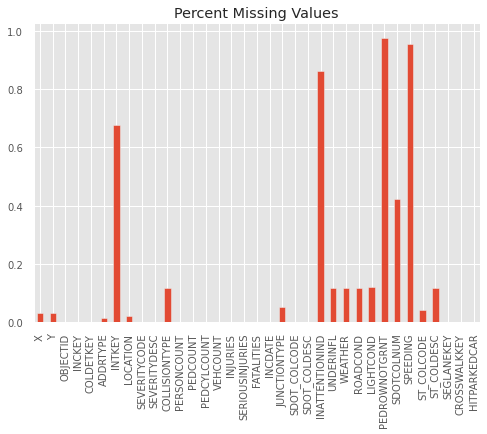

In [125]:
# Basic info and % null categories
#collisions.info()

pct_null = (collisions.isna().sum()/collisions.shape[0]).plot(kind='bar', 
                                                              title="Percent Missing Values")
plt.savefig('../reports/figures/missing_values.png')

In [6]:
collisions.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,212975.000000,212975.000000,220436.000000,220436.000000,220436.000000,71516.000000,220436.000000,220436.000000,220436.000000,220436.000000,220436.000000,220436.000000,220436.000000,220435.000000,1.272050e+05,220436.000000,2.204360e+05
mean,-122.330748,47.620232,110218.500000,143893.625937,144116.360395,37614.720790,2.227145,0.038156,0.027310,1.730697,0.373868,0.015165,0.001674,13.382362,7.971063e+06,262.425969,9.617439e+03
std,0.030042,0.056009,63634.536307,88451.013280,88818.314232,51915.702891,1.471406,0.201881,0.164398,0.829041,0.732352,0.158077,0.044493,7.305444,2.611523e+06,3254.921395,7.160964e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577331,55109.750000,71395.750000,71395.750000,28652.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616106,110218.500000,126707.500000,126707.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664261,165327.250000,208526.250000,208726.250000,33983.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,220436.000000,332640.000000,334140.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
# Pandas profiling, use minimal=True for large dataset
#profile = ProfileReport(collisions, title='Collisions Profile Report', minimal=True)
#profile.to_file('../reports/collisions_profiling.html')


### Notes after initial exploration
1. Use 'INTKEY' to identify intersections.
2. 'SEVERITYCODE' can be used to cross-reference the intersection with severity. How do we reconcile this with 'SERIOUSINJURIES' and 'FATALITIES'?
3. 'SPEEDING' is missing a lot, but this could be a helpful feature.
4. 'JUNCTIONTYPE' or 'ADDRTYPE',  will need OHE for logistic regression. 
5. Target variable? Create 'Dangerous' based on what criteria?



ML Algorithms: can use GBC or RF if we don't want to worry about multicollinearity or preprocessing (OHE/nomalization). 

In [8]:
collisions.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-06,-122.320755,47.608073,1680,3663,3663,Intersection,29797.0,BROADWAY AND CHERRY ST,0,Unknown,NaN,0,0,0,0,0,0,0,2003/10/06 00:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,3279003.0,NaN,NaN,NaN,0,0,N
2004-01-01,NaN,NaN,11627,25040,25040,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,2,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Raining,Dry,Dark - Street Lights On,NaN,4001002.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2004-01-01,-122.318760,47.604359,12525,24635,24635,Block,NaN,E ALDER ST BETWEEN 10TH AVE AND 11TH AVE,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Snowing,Snow/Slush,Unknown,NaN,4001026.0,NaN,32,One parked--one moving,0,0,N
2004-01-01,-122.320780,47.614076,14172,26463,26463,Intersection,29745.0,BROADWAY AND E PIKE ST,2,Injury Collision,Left Turn,4,0,0,2,1,0,0,2004/01/01 00:00:00+00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Overcast,Wet,Dark - Street Lights On,NaN,4001015.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
2004-01-01,NaN,NaN,16515,29248,29248,NaN,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/01/01 00:00:00+00,NaN,0.0,NOT ENOUGH INFORMATION / NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NaN,4001030.0,NaN,NaN,NaN,0,0,N


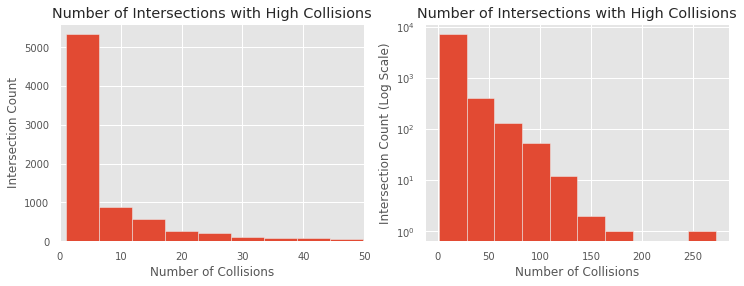

In [53]:
## Look at collision count at specific intersections
n_coll_intersect = collisions.groupby(by='INTKEY').count().sort_values(by='OBJECTID', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.hist(n_coll_intersect['OBJECTID'], bins=50)
ax.set_xlim(0,50)
ax.set_xlabel('Number of Collisions')
ax.set_ylabel('Intersection Count')
ax.set_title("Number of Intersections with High Collisions")

ax = axes[1]
ax.hist(n_coll_intersect['OBJECTID'], bins=10, log=True)
ax.set_xlabel('Number of Collisions')
ax.set_ylabel('Intersection Count (Log Scale)')
ax.set_title("Number of Intersections with High Collisions")

plt.savefig('../reports/figures/intersection_count.png')

In [ ]:
# Find 20 most dangerous intersections


In [117]:
# Break down by pedestrian or cyclist involvement
pedcycle_count = collisions.groupby(by='PEDCYLCOUNT').count()['OBJECTID']
ped_count = collisions.groupby(by='PEDCOUNT').count()['OBJECTID']
pedcycle_count, ped_count

# Get fraction of collisions that included cyclists/pedestrians/no cars
cycle_fraction = pedcycle_count.loc[1:].sum()/pedcycle_count.sum()

# Get fraction of collisions that included pedestrians
ped_fraction = ped_count.loc[1:].sum()/ped_count.sum()

# Are there accidents with no cars involved?
no_cars = collisions.loc[((collisions['PEDCOUNT'] != 0) | \
           (collisions['PEDCYLCOUNT'] != 0)) & \
            (collisions['VEHCOUNT'] == 0)]

#veh_count = collisions.groupby(by='VEHCOUNT').count()['OBJECTID']
no_car_fraction = no_cars.shape[0]/collisions.shape[0]

# # Put these into own dataframe
pd.DataFrame({'Fraction w/cyclist': cycle_fraction, 
              'Fraction w/ped': ped_fraction,
             'Fraction w/no cars': no_car_fraction}, index=range(1))

(collisions['COLLISIONTYPE'] == 'Cycles').sum(), pedcycle_count

(5893,
 PEDCYLCOUNT
 0    214467
 1      5918
 2        51
 Name: OBJECTID, dtype: int64)

In [99]:
# How many of these involve ZERO people (ie, terrible book-keeping)
no_people = collisions.loc[(collisions['PEDCOUNT'] == 0) & \
           (collisions['PEDCYLCOUNT'] == 0) & \
           (collisions['PERSONCOUNT'] == 0) & \
            (collisions['VEHCOUNT'] == 0)]
print(no_people.shape[0]/collisions.shape[0])

no_people['SDOT_COLDESC'].value_counts()

0.08778965323268431


NOT ENOUGH INFORMATION / NOT APPLICABLE                         8060
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          4765
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    3963
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          894
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           529
                                                                ... 
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT SIDE AT ANGLE        1
PEDALCYCLIST RAN OFF ROAD - HIT FIXED OBJECT                       1
MOTOR VEHICLE STRUCK PEDALCYCLIST, RIGHT SIDE SIDESWIPE            1
DRIVERLESS VEHICLE STRUCK OBJECT IN ROADWAY                        1
MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE             1
Name: SDOT_COLDESC, Length: 31, dtype: int64

In [92]:
def find_collision_types(df):
    pass